#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.01 Frequency, Amplitude, and Phase</font>
# <font color=red>Give it a Try!</font>
# <font color=red>Part 2</font>

### Setup

In [2]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.01.G2) Adding Timeseries together</font>

### <font color=red>DSP.01.G2.a) Adding Timeseries together</font>

Add a 4 Hz and 7 Hz sine wave together and plot the result.

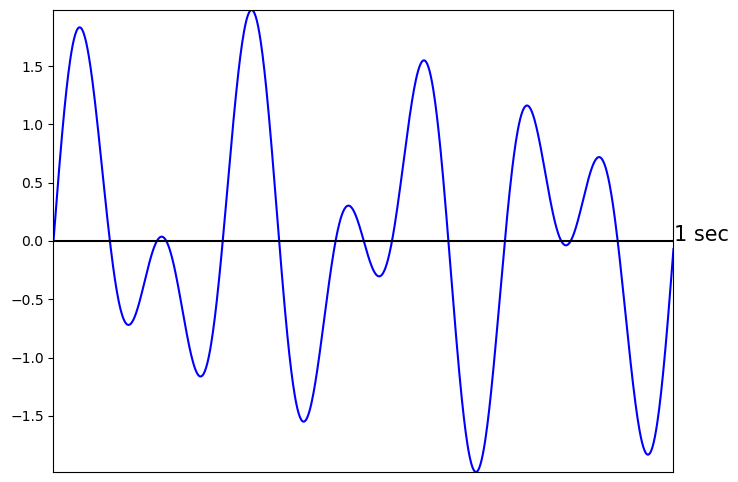

In [2]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq1 = 4
freq2 = 7
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

### <font color=red>DSP.01.G2.b) Adding Timeseries together</font>

Add a 30 Hz and 7 Hz sine wave together and plot the result.

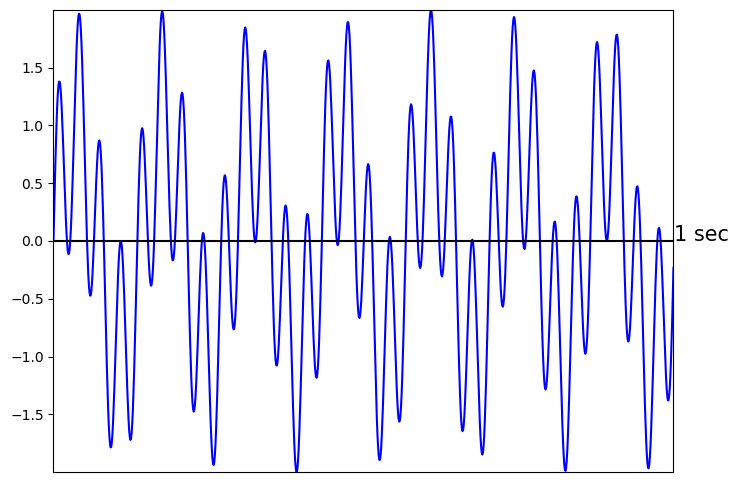

In [3]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq1 = 30
freq2 = 7
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)

plt.show()

### <font color=red>DSP.01.G2.c) Adding Timeseries together</font>

Run the code and create a figure showing the sum of a 5 Hz and a 20 Hz sine wave.

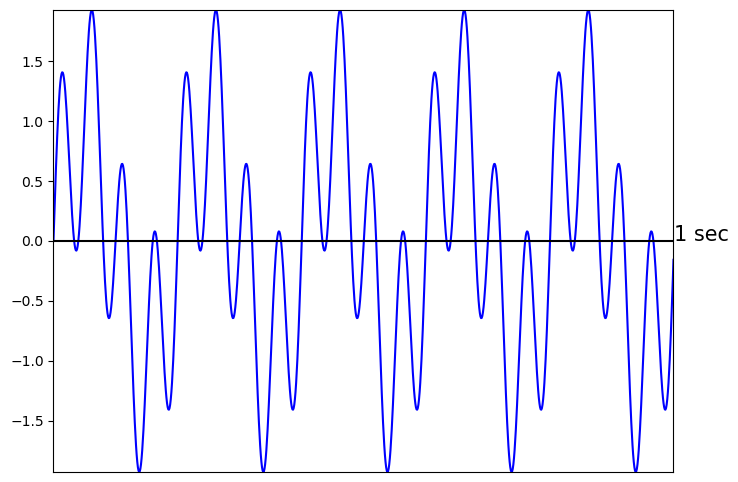

In [6]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq1 = 5
freq2 = 20
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)

plt.text(1,0,'1 sec',fontsize=15)

plt.show()

### <font color=red>DSP.01.G2.d) Adding Timeseries together</font>

Run the code and create a figure showing two 10 Hz sine waves as well as the plotting the sum of the two 10 Hz sine waves.

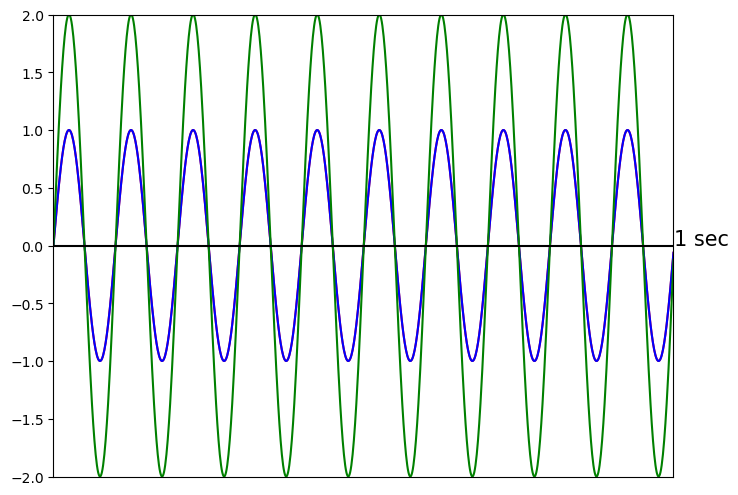

In [5]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq1 = 10
freq2 = 10
timeseries1 = np.sin(2*np.pi * freq1 * time) 
timeseries2 = np.sin(2*np.pi * freq2 * time)
timeseries3 = timeseries1 + timeseries2

# Plotting time vs amplitude using plot function
make_plot_3(time,timeseries1,'red', time,timeseries2,'blue', time,timeseries3,'green')

# Adding text to the plot
plt.text(1,0,'1 sec',fontsize=15)

# Finally displaying the plot
plt.show()

Can you figure out why you may see only two signals, in green and blue? And why, on some displays, you may see a hint of red around the blue? Both of those observations are due to the two original 10 Hz signals are identical - in frequency, amplitude, and phase - so the second one lands on top of the first one. Comment on what happens to the amplitude when you sum two 10 Hz sine waves that have the same
phase (= 'are in phase'). Run some simulations to see if this appears to be true for all frequencies. For example, you can edit the code so both original signsls are 14 Hz, instead of 25 Hz.

**If the two sine waves have the same frequency and phase the amplitude sums.**

### <font color=red>DSP.01.G2.e) Adding Timeseries together</font>

Run the code and create a figure showing the sum of a 25 Hz and another 25 Hz sine wave.

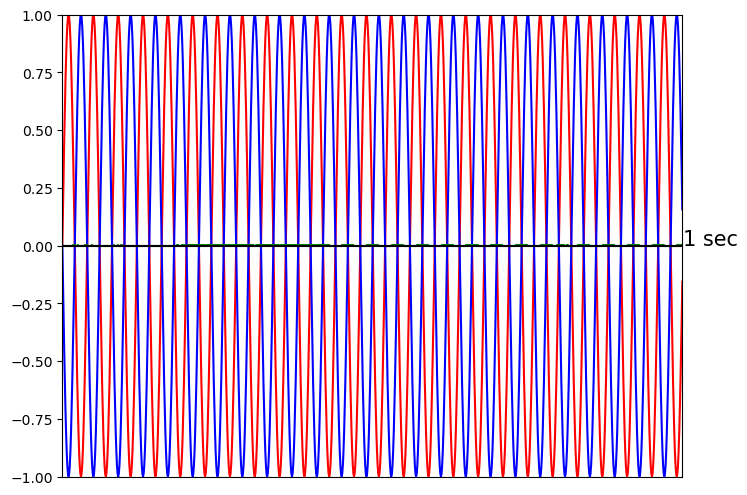

In [4]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq1 = 25
freq2 = 25
timeseries1 = np.sin(2*np.pi * freq1 * time) 
timeseries2 = np.sin(2*np.pi * freq2 * time + np.pi)
timeseries3 = timeseries1 + timeseries2

# Plotting time vs amplitude using plot function 
make_plot_3(time,timeseries1,'red', time,timeseries2,'blue', time,timeseries3,'green')

# Adding text to the plot
plt.text(1,0,'1 sec',fontsize=15)

# Finally displaying the plot
plt.show()

In that same code box above, change the phase of the second sine wave to start at π instead of at zero and comment on what happens. Run some simulations to see if this appears to be true for all frequencies.

**When summing two timeseries of the same frequency, if the two timeseries are 180 degrees (= π) out of phase then they cancel each other out (e.g., one sine wave is at its peak and the other at its trough), resulting in a zero amplitude timeseries at all time times.**

### <font color=red>DSP.01.G2.f) Creating a time series that is any shape</font>

You can get a some interesting-looking timeseries by adding sine and cosine waves together. (Of
course, we know that a cosine function is the same sine function except for a 90-degree = π/
2 phase
shift.) Using the examples in the Basics and Tutorials, come up with your own interesting timeseries.

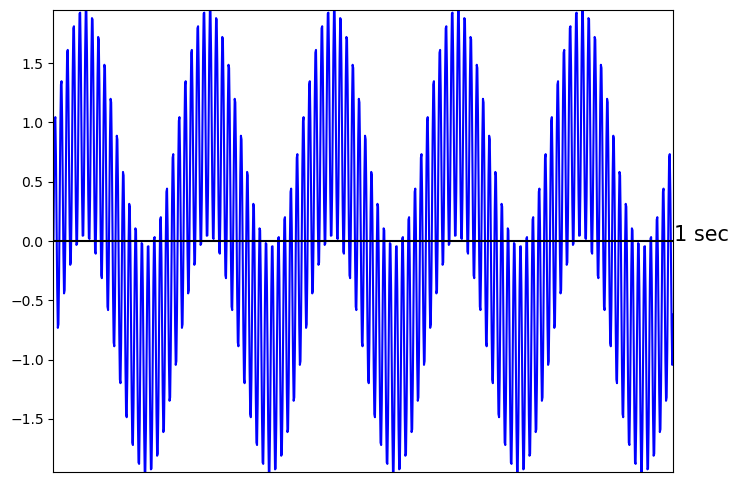

In [16]:
time = np.arange(0,1,0.001) #create an array representing 1 second
freq1 = 5
freq2 = 100
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()